# Tensorflow CNN for MNIST

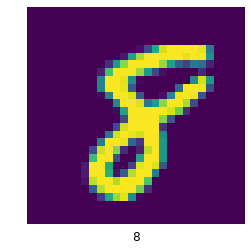

In [25]:
%matplotlib inline
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
tf.logging.set_verbosity(tf.logging.ERROR)  

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


imageIndex = 777
plt.imshow(x_train[imageIndex])
plt.title(y_train[imageIndex], y=-0.1)
plt.axis("off")
plt.show()

In [2]:
x_train.shape

(60000, 28, 28)

In [27]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
inputShape = (28, 28, 1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

print("X Train shape: {}".format(x_train.shape))
print("Number of images in x_train: {}, number of images in x_test: {}".format(x_train.shape[0], x_test.shape[0]))

X Train shape: (60000, 28, 28, 1)
Number of images in x_train: 60000, number of images in x_test: 10000


# Make model

In [28]:
import warnings
warnings.filterwarnings('ignore')

# CNN With 1 Conv layer and 1 max pool layer
model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected neural network
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 400us/step - loss: 0.2096 - acc: 0.9374 - val_loss: 0.0829 - val_acc: 0.9738
Epoch 2/10
60000/60000 [==============================] - 23s 379us/step - loss: 0.0858 - acc: 0.9731 - val_loss: 0.0629 - val_acc: 0.9812
Epoch 3/10
60000/60000 [==============================] - 23s 384us/step - loss: 0.0606 - acc: 0.9812 - val_loss: 0.0599 - val_acc: 0.9815
Epoch 4/10
60000/60000 [==============================] - 25s 411us/step - loss: 0.0480 - acc: 0.9847 - val_loss: 0.0561 - val_acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 26s 437us/step - loss: 0.0359 - acc: 0.9880 - val_loss: 0.0547 - val_acc: 0.9834
Epoch 6/10
60000/60000 [==============================] - 27s 451us/step - loss: 0.0306 - acc: 0.9901 - val_loss: 0.0472 - val_acc: 0.9865
Epoch 7/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.0243 - acc: 0.9919 - val_loss: 0.

In [29]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

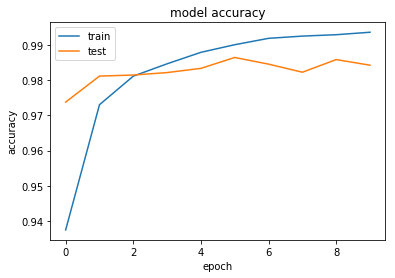

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

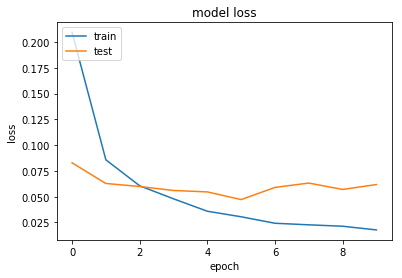

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
"Loss: {0[0]}, accuracy: {0[1]}".format(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 2s 162us/step


'Loss: 0.061828486965284535, accuracy: 0.9843'